In [38]:
#classification without tuning

In [10]:

!unzip '/content/Animal_Dataset.zip'

Archive:  /content/Animal_Dataset.zip
replace dataset/Testing/bears/k4 (100).jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: dataset/Testing/bears/k4 (100).jpeg  
replace dataset/Testing/bears/k4 (100).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: dataset/Testing/bears/k4 (100).jpg  
  inflating: dataset/Testing/bears/k4 (101).jpeg  
  inflating: dataset/Testing/bears/k4 (101).jpg  
  inflating: dataset/Testing/bears/k4 (102).jpeg  
  inflating: dataset/Testing/bears/k4 (102).jpg  
  inflating: dataset/Testing/bears/k4 (103).jpeg  
  inflating: dataset/Testing/bears/k4 (104).jpeg  
  inflating: dataset/Testing/bears/k4 (105).jpeg  
  inflating: dataset/Testing/bears/k4 (106).jpeg  
  inflating: dataset/Testing/bears/k4 (107).jpeg  
  inflating: dataset/Testing/bears/k4 (108).jpeg  
  inflating: dataset/Testing/bears/k4 (109).jpeg  
  inflating: dataset/Testing/bears/k4 (110).jpeg  
  inflating: dataset/Testing/bears/k4 (71).jpg  
  inflating: dataset/Testing/bear

In [4]:
#Data augmentation
#more images - more learning
#flipping,rotating the image

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_gen=ImageDataGenerator(rescale=(1./255),horizontal_flip=True,shear_range=0.2)
test_gen=ImageDataGenerator(rescale=(1./255),horizontal_flip=True,shear_range=0.2)

In [12]:
train= train_gen.flow_from_directory('/content/dataset/Training',
                                     target_size=(120,120),
                                     class_mode='categorical',
                                     batch_size=8)
test=test_gen.flow_from_directory('/content/dataset/Testing',
                                  target_size=(120,120),
                                  class_mode='categorical',
                                  batch_size=8)

Found 1238 images belonging to 4 classes.
Found 326 images belonging to 4 classes.


In [13]:
#cnn 
from tensorflow.keras.layers import Convolution2D #convolution layer
from tensorflow.keras.layers import MaxPooling2D #pooling layer
from tensorflow.keras.layers import Flatten #flatten layer
from tensorflow.keras.layers import Dense #ANN layer - fully connected


In [15]:
#build skeleton
from  tensorflow.keras.models import Sequential 
model=Sequential()
model.add(Convolution2D(20,(3,3),activation='relu',input_shape=(120,120,3))) #add number of feature map =20 , (3,3)-matrix size, input=relu, dimension=(target size, rgb=3 or bw =1)
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(45,activation='relu'))#hidden layer
model.add(Dense(4,activation='softmax'))#output 4-num of class , softmax-op act

In [16]:
train.class_indices

{'bears': 0, 'crows': 1, 'elephants': 2, 'rats': 3}

In [17]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
model.fit(train,batch_size=8,validation_data=test,epochs=10)

Epoch 1/10
155/155 [==============================] - 21s 73ms/step - loss: 1.7042 - accuracy: 0.3918 - val_loss: 1.1074 - val_accuracy: 0.6288
Epoch 2/10
155/155 [==============================] - 11s 68ms/step - loss: 0.9686 - accuracy: 0.6018 - val_loss: 0.7082 - val_accuracy: 0.6810
Epoch 3/10
155/155 [==============================] - 10s 63ms/step - loss: 0.6404 - accuracy: 0.7544 - val_loss: 0.4164 - val_accuracy: 0.8528
Epoch 4/10
155/155 [==============================] - 11s 70ms/step - loss: 0.4466 - accuracy: 0.8498 - val_loss: 0.3427 - val_accuracy: 0.8712
Epoch 5/10
155/155 [==============================] - 11s 69ms/step - loss: 0.3040 - accuracy: 0.9111 - val_loss: 0.2607 - val_accuracy: 0.9110
Epoch 6/10
155/155 [==============================] - 11s 69ms/step - loss: 0.1907 - accuracy: 0.9475 - val_loss: 0.0759 - val_accuracy: 1.0000
Epoch 7/10
155/155 [==============================] - 11s 69ms/step - loss: 0.1329 - accuracy: 0.9677 - val_loss: 0.0682 - val_accuracy:

In [19]:
model.save('animalwts.h5')

In [20]:
#testing
import numpy as np
from tensorflow.keras.preprocessing import image


In [22]:
img=image.load_img('/content/licensed-image.jpeg',target_size=(120,120))

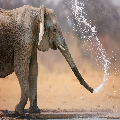

In [23]:
img

In [25]:
img=image.img_to_array(img)

In [26]:
#img has only 2 channels but we need 3 dimension for rgb

In [27]:
img

array([[[132., 126., 130.],
        [144., 134., 142.],
        [142., 132., 140.],
        ...,
        [191., 186., 192.],
        [191., 184., 191.],
        [187., 182., 188.]],

       [[120., 120., 122.],
        [135., 125., 133.],
        [135., 125., 133.],
        ...,
        [192., 185., 192.],
        [187., 182., 188.],
        [187., 182., 188.]],

       [[118., 108., 116.],
        [128., 118., 126.],
        [126., 115., 123.],
        ...,
        [189., 183., 187.],
        [189., 184., 190.],
        [189., 184., 190.]],

       ...,

       [[124., 100.,  90.],
        [ 70.,  51.,  45.],
        [169., 147., 136.],
        ...,
        [148., 129., 115.],
        [146., 124., 111.],
        [134., 112.,  99.]],

       [[135., 108.,  97.],
        [140., 116., 104.],
        [ 80.,  56.,  46.],
        ...,
        [ 86.,  77.,  72.],
        [ 93.,  84.,  85.],
        [138., 128., 126.]],

       [[185., 167., 157.],
        [121.,  96.,  76.],
        [ 61.,  

In [31]:
image=np.expand_dims(img,axis=0)

In [32]:
image

array([[[[132., 126., 130.],
         [144., 134., 142.],
         [142., 132., 140.],
         ...,
         [191., 186., 192.],
         [191., 184., 191.],
         [187., 182., 188.]],

        [[120., 120., 122.],
         [135., 125., 133.],
         [135., 125., 133.],
         ...,
         [192., 185., 192.],
         [187., 182., 188.],
         [187., 182., 188.]],

        [[118., 108., 116.],
         [128., 118., 126.],
         [126., 115., 123.],
         ...,
         [189., 183., 187.],
         [189., 184., 190.],
         [189., 184., 190.]],

        ...,

        [[124., 100.,  90.],
         [ 70.,  51.,  45.],
         [169., 147., 136.],
         ...,
         [148., 129., 115.],
         [146., 124., 111.],
         [134., 112.,  99.]],

        [[135., 108.,  97.],
         [140., 116., 104.],
         [ 80.,  56.,  46.],
         ...,
         [ 86.,  77.,  72.],
         [ 93.,  84.,  85.],
         [138., 128., 126.]],

        [[185., 167., 157.],
       

In [37]:
np.argmax(model.predict(image)) #2 denotes elephant

1/1 [==============================] - 0s 23ms/step


2